# Planejamento do Projeto

Objetivo do Projeto: Identificar padrões de risco e possíveis fraudes em transações bancárias.

Principais questões a responder:
1. Quais características indicam um risco maior em uma transação?
2. Quais os padrões mais comuns entre transações suspeitas?
3. É possível classificar transações ou clientes em grupos com comportamento semelhante?

### Passo 1: Criação do Dataset Simulado
Como dados bancários são sigilosos, precisarei criar um dataset fictício usando a biblioteca Faker para gerar dados com algum nível de realismo.

Estrutura do Dataset:
* TransactionID: ID único da transação.
* CustomerID: ID do cliente.
* TransactionAmount: Valor da transação.
* TransactionDate: Data e hora da transação.
* TransactionType: Tipo de transação (Ex.: PIX, TED, Cartão).
* Location: Local (cidade ou país).
* Bank: Banco.
* RiskFlag: Indicador de risco (0 = normal e 1 = suspeita).

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from faker import Faker # Biblioteca para geração de dados fictícios

fake = Faker() 
Faker.seed(42) # Seed para reprodução dos resultados

# Configurações do dataset
n_rows = 10_000 # Número de linhas
transaction_types = ['PIX', 'TED' , 'DOC', 'Saque', 'Depósito', 'Empréstimo', 'Financiamento', 'Cartão', 'Boleto'] # Tipos de transação
locations = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Brasília'] # Localizações
banks = ['Bancão', 'ItuBanco', 'BraBanco', 'SantaBanco', 'Banco Caixote', 'NurmaBanco'] # Bancos


# Gerar dados fictícios
data = {
    "TransactionID": [fake.uuid4() for _ in range(n_rows)], # Identificador único da transação
    "CustomerID": [fake.random_int(min=1, max=5000) for _ in range(n_rows)], # Identificador único do cliente
    "TransactionAmount": [round(random.uniform(10, 50000), 2) for _ in range(n_rows)], # Valor da transação
    "TransactionDate": [fake.date_time() for _ in range(n_rows)], 
    "TransactionType": [random.choice(transaction_types) for _ in range(n_rows)], 
    "Location": [random.choice(locations) for _ in range(n_rows)],
    "Bank": [random.choice(banks) for _ in range(n_rows)], 
    "RiskFlag": [random.choices([0, 1], weights=[95, 5])[0] for _ in range(n_rows)], # Flag de risco
}

df = pd.DataFrame(data) 

In [2]:
df.head()

,TransactionID,CustomerID,TransactionAmount,TransactionDate,TransactionType,Location,Bank,RiskFlag
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,3796,8494.84,2007-02-20 20:03:57,Empréstimo,Rio de Janeiro,ItuBanco,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,4095,46000.09,1990-11-05 11:57:47,PIX,Brasília,Bancão,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,2778,49122.64,1980-07-21 02:48:22,Boleto,Brasília,SantaBanco,0
3,972a8469-1641-4f82-8b9d-2434e465e150,2821,46686.50,1997-02-22 08:29:06,Saque,Rio de Janeiro,BraBanco,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,2087,8512.96,2005-07-21 15:09:47,TED,Brasília,BraBanco,0


### Passo 2: Transformação de Dados: Colunas `TransactionType` e `Location`  

Para facilitar a análise dos dados e a criação de gráficos, transformarei as colunas categóricas `TransactionType`, `Location` e `Bank` em representações numéricas. 
Essa abordagem será necessária para realizar cálculos estatísticos e gerar gráficos de maneira mais eficiente.

1. **Dicionário para `TransactionType`**  
   Cada tipo de transação, cidade e banco receberá um número único:
     
| TransactionType  | TransactionTypeNum | Location         | LocationNum | Bank           | BankNum |
|------------------|--------------------|------------------|-------------|----------------|---------|
| PIX              | 1                  | São Paulo        | 1           | Bancão         | 1       |
| TED              | 2                  | Rio de Janeiro   | 2           | ItuBanco       | 2       |
| DOC              | 3                  | Belo Horizonte   | 3           | BraBanco       | 3       |
| Saque            | 4                  | Curitiba         | 4           | SantaBanco     | 4       |
| Depósito         | 5                  | Brasília         | 5           | Banco Caixote  | 5       |
| Empréstimo       | 6                  | --------         | -           | NurmaBanco     | 6       |
| Financiamento    | 7                  | --------         | -           | -------------  | -       |
| Cartão           | 8                  | --------         | -           | -------------  | -       |
| Boleto           | 9                  | --------         | -           | -------------  | -       |




In [3]:
# Dicionário para mapear os valores da TransactionType
transaction_type_mapping = {
    "PIX": 1,
    "TED": 2,
    "DOC": 3,
    "Saque": 4,
    "Depósito": 5,
    "Empréstimo": 6,
    "Financiamento": 7,
    "Cartão": 8,
    "Boleto": 9
}

# Dicionário para mapear os valores da Location
location_mapping = {
    "São Paulo": 1,
    "Rio de Janeiro": 2,
    "Belo Horizonte": 3,
    "Curitiba": 4,
    "Brasília": 5
}

# Dicionário para mapear os valores dos Bancos
bank_mapping = {
    "Bancão": 1,
    "ItuBanco": 2,
    "BraBanco": 3,
    "SantaBanco": 4,
    "Banco Caixote": 5,
    "NurmaBanco": 6    
}


# Criar as novas colunas com base nos mapeamentos
df['TransactionTypeNum'] = df['TransactionType'].map(transaction_type_mapping)
df['LocationNum'] = df['Location'].map(location_mapping)
df['BankNum'] = df['Bank'].map(bank_mapping)
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionHour'] = df['TransactionDate'].dt.hour

In [4]:
#df['RiskFlag'].value_counts()
df.head()

,TransactionID,CustomerID,TransactionAmount,TransactionDate,TransactionType,Location,Bank,RiskFlag,TransactionTypeNum,LocationNum,BankNum,TransactionMonth,TransactionYear,TransactionHour
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,3796,8494.84,2007-02-20 20:03:57,Empréstimo,Rio de Janeiro,ItuBanco,0,6,2,2,2,2007,20
1,23b8c1e9-3924-46de-beb1-3b9046685257,4095,46000.09,1990-11-05 11:57:47,PIX,Brasília,Bancão,0,1,5,1,11,1990,11
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,2778,49122.64,1980-07-21 02:48:22,Boleto,Brasília,SantaBanco,0,9,5,4,7,1980,2
3,972a8469-1641-4f82-8b9d-2434e465e150,2821,46686.50,1997-02-22 08:29:06,Saque,Rio de Janeiro,BraBanco,0,4,2,3,2,1997,8
4,17fc695a-07a0-4a6e-8822-e8f36c031199,2087,8512.96,2005-07-21 15:09:47,TED,Brasília,BraBanco,0,2,5,3,7,2005,15


### Passo 3: Verificação de Correlações entre colunas

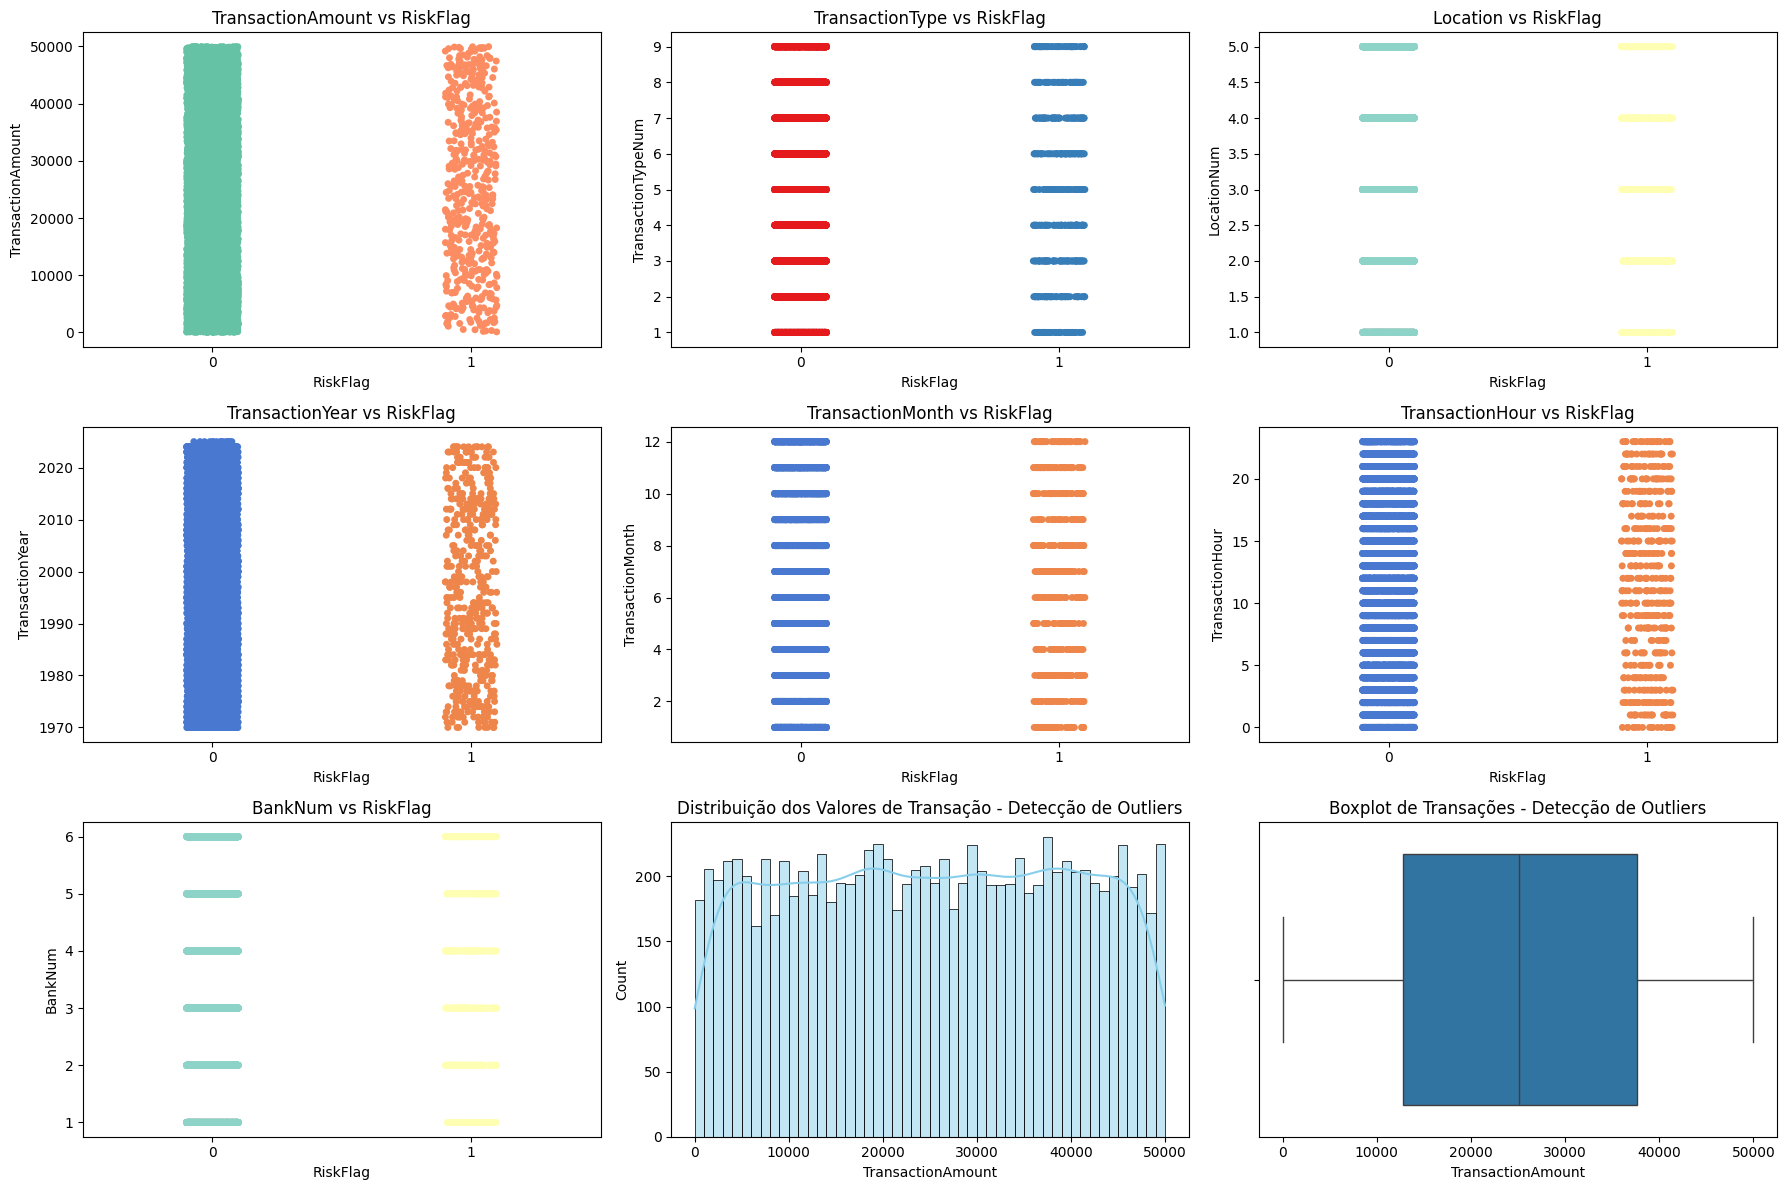

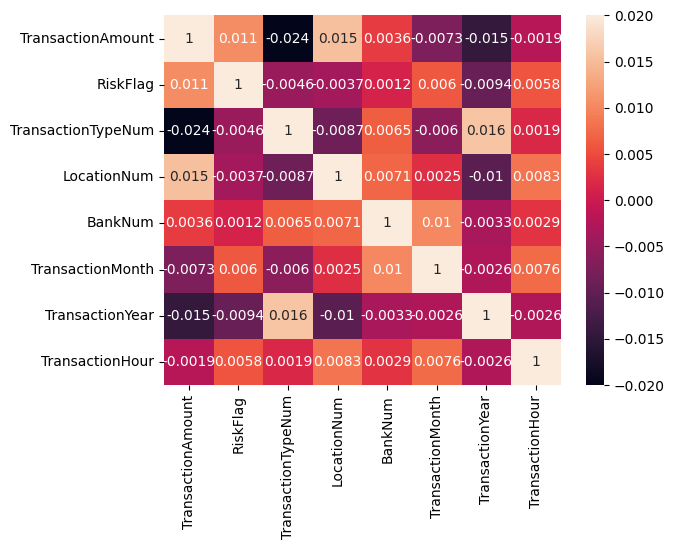

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Plot para TransactionAmount
sns.stripplot(x='RiskFlag', y='TransactionAmount', data=df, jitter=True, hue='RiskFlag', palette='Set2', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('TransactionAmount vs RiskFlag')

# Plot para TransactionTypeNum
sns.stripplot(x='RiskFlag', y='TransactionTypeNum', data=df, jitter=True, hue='RiskFlag', palette='Set1', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('TransactionType vs RiskFlag')

# Plot para LocationNum
sns.stripplot(x='RiskFlag', y='LocationNum', data=df, jitter=True, hue='RiskFlag', palette='Set3', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Location vs RiskFlag')

# Plot para TransactionYear
sns.stripplot(x='RiskFlag', y='TransactionYear', data=df, jitter=True, hue='RiskFlag', palette='muted', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('TransactionYear vs RiskFlag')

# Plot para TransactionDateMonth
sns.stripplot(x='RiskFlag', y='TransactionMonth', data=df, jitter=True, hue='RiskFlag', palette='muted', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('TransactionMonth vs RiskFlag')

# Plot para TransactionHour
sns.stripplot(x='RiskFlag', y='TransactionHour', data=df, jitter=True, hue='RiskFlag', palette='muted', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('TransactionHour vs RiskFlag')

# Plot para BankNum
sns.stripplot(x='RiskFlag', y='BankNum', data=df, jitter=True, hue='RiskFlag', palette='Set3', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('BankNum vs RiskFlag')

sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='skyblue', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Distribuição dos Valores de Transação - Detecção de Outliers')

sns.boxplot(x=df['TransactionAmount'], legend=False)
axs[2, 2].set_title('Boxplot de Transações - Detecção de Outliers')


# Ajuste do layout
plt.tight_layout()
plt.show()


# Filtrar apenas as colunas numéricas
df_selected = df[['TransactionAmount', 'RiskFlag', 'TransactionTypeNum', 'LocationNum', 'BankNum', 'TransactionMonth', 'TransactionYear', 'TransactionHour']]
dataplot = sns.heatmap(df_selected.corr(), annot=True, vmin=-0.02, vmax=0.02)

### Passo 4: Frequência de transações suspeitas por localização, tipo e banco

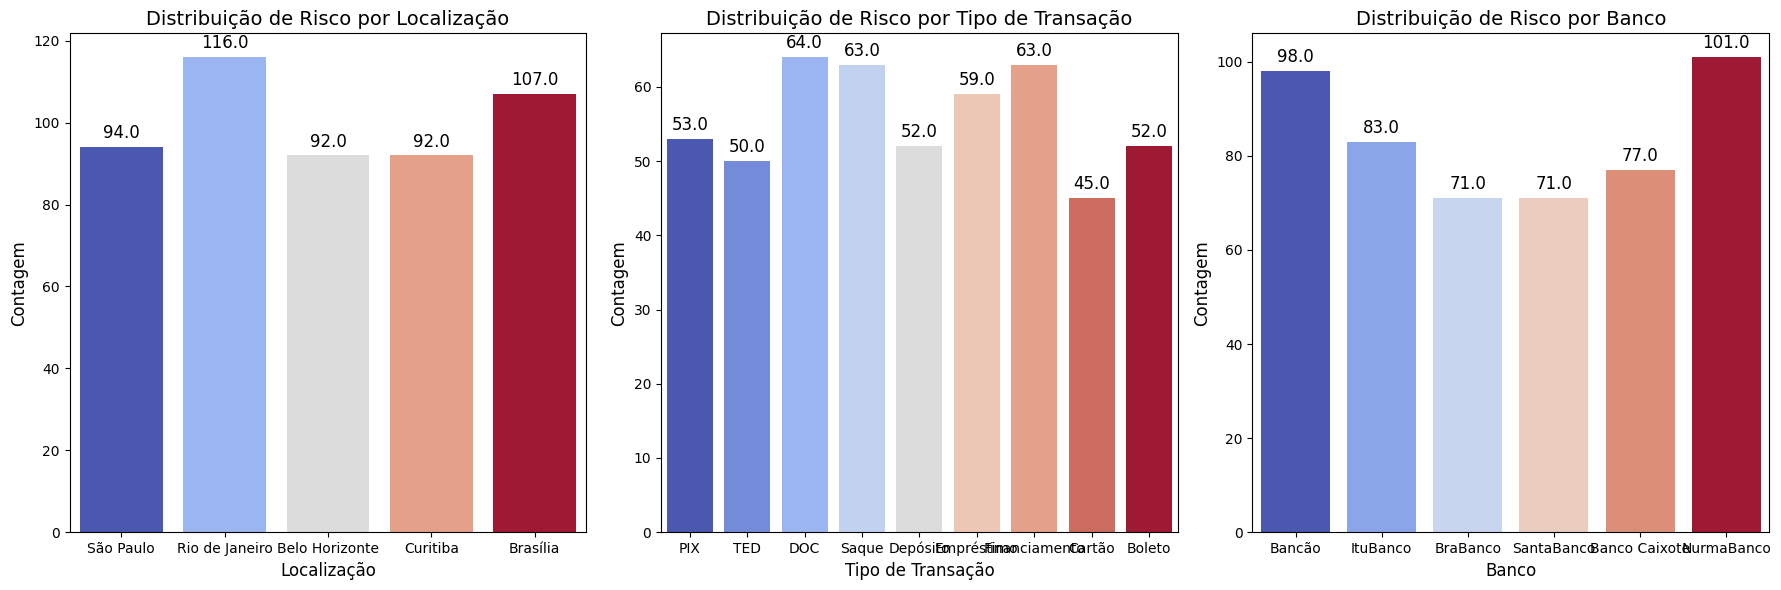

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de localizações
location_mapping = {
    0: "São Paulo",
    1: "Rio de Janeiro",
    2: "Belo Horizonte",
    3: "Curitiba",
    4: "Brasília"
}

# Dicionário de tipos de transações
transaction_type_mapping = {
    0: "PIX",
    1: "TED",
    2: "DOC",
    3: "Saque",
    4: "Depósito",
    5: "Empréstimo",
    6: "Financiamento",
    7: "Cartão",
    8: "Boleto"
}

# Dicionário para mapear os valores dos Bancos
bank_mapping = {
    0: "Bancão",
    1: "ItuBanco",
    2: "BraBanco",
    3: "SantaBanco",
    4: "Banco Caixote",
    5: "NurmaBanco"
}

# Filtrar os dados para RiskFlag = 1
df_risk = df[df['RiskFlag'] == 1].dropna(subset=['LocationNum'])

# Definir o número de linhas e colunas para os subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha e 3 colunas

# Gráfico de barras para Localização
sns.countplot(data=df_risk, x='LocationNum', palette='coolwarm', hue='LocationNum', ax=axs[0], legend=False)

# Alterar os valores do eixo x para os nomes das cidades do dicionário
xticks = axs[0].get_xticks()
axs[0].set_xticks(xticks)
axs[0].set_xticklabels([location_mapping.get(int(x), x) for x in xticks])  # Substituir pelos nomes

# Adicionar valores nas barras
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    fontsize=12, 
                    color='black', 
                    xytext=(0, 10), 
                    textcoords='offset points')

axs[0].set_title('Distribuição de Risco por Localização', fontsize=14)
axs[0].set_xlabel('Localização', fontsize=12)
axs[0].set_ylabel('Contagem', fontsize=12)

# Gráfico de barras para Tipo de Transação
sns.countplot(data=df_risk, x='TransactionTypeNum', palette='coolwarm', hue='TransactionTypeNum', ax=axs[1], legend=False)

# Alterar os valores do eixo x para os nomes dos tipos de transações do dicionário
xticks = axs[1].get_xticks()
axs[1].set_xticks(xticks)
axs[1].set_xticklabels([transaction_type_mapping.get(int(x), x) for x in xticks])  # Substituir pelos nomes

# Adicionar valores nas barras
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    fontsize=12, 
                    color='black', 
                    xytext=(0, 10), 
                    textcoords='offset points')

axs[1].set_title('Distribuição de Risco por Tipo de Transação', fontsize=14)
axs[1].set_xlabel('Tipo de Transação', fontsize=12)
axs[1].set_ylabel('Contagem', fontsize=12)

# Gráfico de barras para Banco
sns.countplot(data=df_risk, x='BankNum', palette='coolwarm', hue='BankNum', ax=axs[2], legend=False)

# Alterar os valores do eixo x para os nomes dos bancos do dicionário
xticks = axs[2].get_xticks()
axs[2].set_xticks(xticks)
axs[2].set_xticklabels([bank_mapping.get(int(x), x) for x in xticks])  # Substituir pelos nomes

# Adicionar valores nas barras
for p in axs[2].patches:
    axs[2].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    fontsize=12, 
                    color='black', 
                    xytext=(0, 10), 
                    textcoords='offset points')

axs[2].set_title('Distribuição de Risco por Banco', fontsize=14)
axs[2].set_xlabel('Banco', fontsize=12)
axs[2].set_ylabel('Contagem', fontsize=12)

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Passo 5: Análise de Outliers
O histograma ajuda a perceber a concentração de transações e os valores que se distanciam dessa concentração

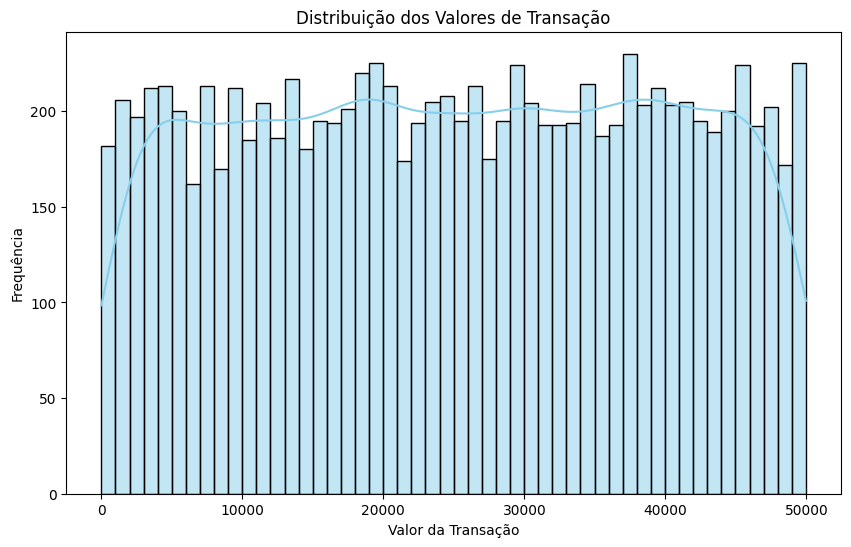

In [10]:
# Plotando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='skyblue')
plt.title("Distribuição dos Valores de Transação")
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.show()



### Passo 6: Criação de Clusters de Clientes
Usaremos o algoritmo KMeans para agrupar os clientes em diferentes perfis com base em suas transações e identificar comportamentos distintos.

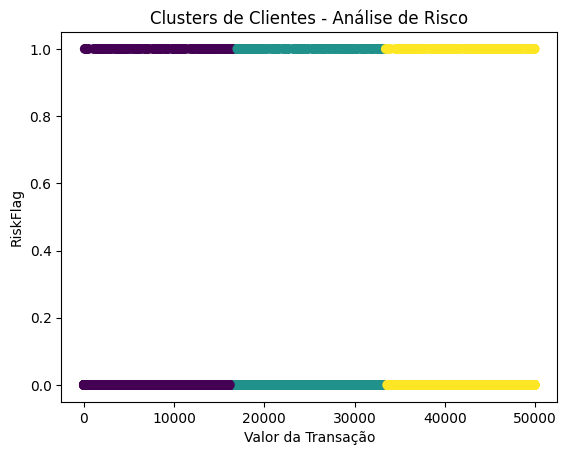

In [8]:
from sklearn.cluster import KMeans

# Selecionando as características relevantes para o clustering
X = df[['TransactionAmount', 'RiskFlag']]  # Exemplo de características

# Aplicando KMeans para agrupar os clientes em 3 clusters
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizando os clusters
import matplotlib.pyplot as plt

plt.scatter(df['TransactionAmount'], df['RiskFlag'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes - Análise de Risco')
plt.xlabel('Valor da Transação')
plt.ylabel('RiskFlag')
plt.show()